In [1]:
cd C:/Users/Watson Turbo/Desktop

C:\Users\Watson Turbo\Desktop


In [2]:
pwd

'C:\\Users\\Watson Turbo\\Desktop'

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Create dataframes from FRED data
cpi = pd.read_csv("CPI.csv")
wti = pd.read_csv("WTI.csv")
ind = pd.read_csv("Industrial Production.csv")
debt = pd.read_csv("Debt.csv")

In [5]:
cpi.head()

,Date,CPI
0,1/1/1947,21.48
1,2/1/1947,21.62
2,3/1/1947,22.00
3,4/1/1947,22.00
4,5/1/1947,21.95


In [6]:
wti.head()

,Date,WTI
0,1/1/1947,1.62
1,2/1/1947,1.62
2,3/1/1947,1.62
3,4/1/1947,1.87
4,5/1/1947,1.87


In [7]:
ind.head()

,Date,Prod
0,1/1/1947,14.0679
1,2/1/1947,14.1510
2,3/1/1947,14.2341
3,4/1/1947,14.1233
4,5/1/1947,14.1787


In [8]:
debt.head()

,Date,Debt
0,1/1/1947,267.0
1,2/1/1947,268.8
2,3/1/1947,266.7
3,4/1/1947,265.0
4,5/1/1947,265.7


In [9]:
#Check date types
debt.dtypes, wti.dtypes, cpi.dtypes, ind.dtypes

(Date     object
 Debt    float64
 dtype: object, Date     object
 WTI     float64
 dtype: object, Date     object
 CPI     float64
 dtype: object, Date     object
 Prod    float64
 dtype: object)

In [10]:
#Convert Dates to be measurable
wti['Date'] = wti['Date'].astype('datetime64[ns]')
cpi['Date'] = cpi['Date'].astype('datetime64[ns]')
ind['Date'] = ind['Date'].astype('datetime64[ns]')
debt['Date'] = debt['Date'].astype('datetime64[ns]')

In [11]:
#Merge Dataframes based on Date
econ = pd.merge(wti, cpi)
econ = pd.merge(econ, ind)
econ = pd.merge(econ, debt)

In [12]:
econ.head()

,Date,WTI,CPI,Prod,Debt
0,1947-01-01,1.62,21.48,14.0679,267.0
1,1947-02-01,1.62,21.62,14.1510,268.8
2,1947-03-01,1.62,22.00,14.2341,266.7
3,1947-04-01,1.87,22.00,14.1233,265.0
4,1947-05-01,1.87,21.95,14.1787,265.7


In [13]:
# see if any columns have nulls
display(econ.isnull().any())

Date    False
WTI     False
CPI     False
Prod    False
Debt    False
dtype: bool

In [14]:
#Explore Stats
econ.describe(include='all')

,Date,WTI,CPI,Prod,Debt
count,869,869.000000,869.000000,869.000000,869.000000
unique,869,NaN,NaN,NaN,NaN
top,1995-01-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,1947-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2019-05-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,25.269162,108.923838,58.640564,4597.646145
std,NaN,27.625947,76.907265,30.450577,6110.097682
min,NaN,1.620000,21.480000,13.569500,253.800000
25%,NaN,3.000000,31.280000,31.376000,308.900000


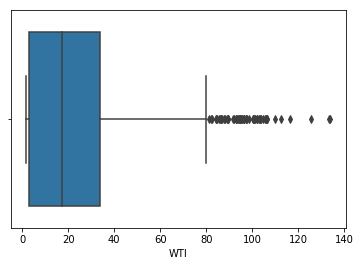

In [15]:
#Box Plot
sns.boxplot(x="WTI",data=econ)

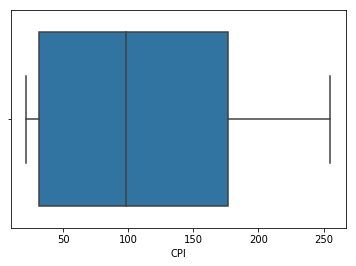

In [16]:
sns.boxplot(x="CPI",data=econ)

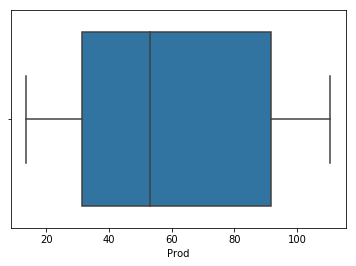

In [17]:
sns.boxplot(x="Prod",data=econ)

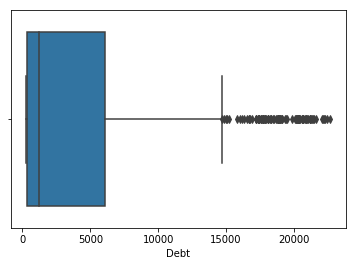

In [18]:
sns.boxplot(x="Debt",data=econ)

Interestingly enough, Debt and Oil boxplots show numerous outliers beyond the 75th percentile.

I would imagine these are both from recent spikes.

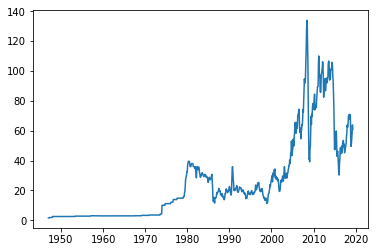

In [19]:
#Plot Oil Price with Matplotlib
from pandas import Series
x = econ['Date']
oil = econ['WTI']
plt.plot(x,oil)
plt.show()

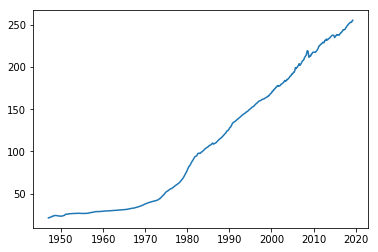

In [20]:
#Plot Inflation
cpi = econ['CPI']
plt.plot(x, cpi)
plt.show()

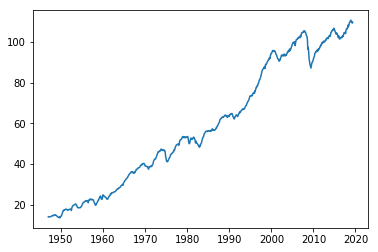

In [21]:
#Plot Industrial Production Index
prod = econ['Prod']
plt.plot(x, prod)
plt.show()

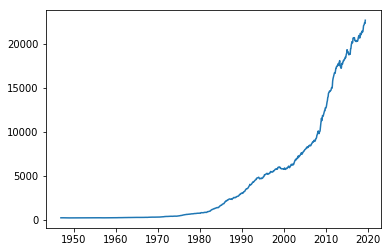

In [22]:
#Plot Federal Debt
debt = econ['Debt']
plt.plot(x, debt)
plt.show()

None of our data seems very stationary.
Therefore, we canot assume Constant Mean and Constant Variance.

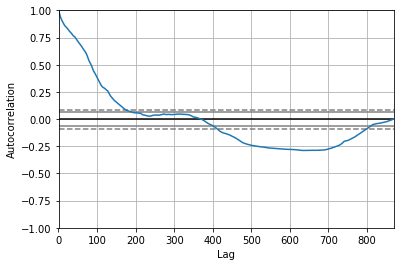

In [23]:
#Auto Correlation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(oil)
plt.show()

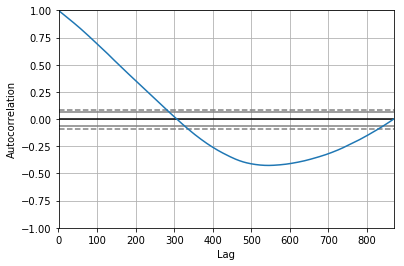

In [24]:
autocorrelation_plot(cpi)
plt.show()

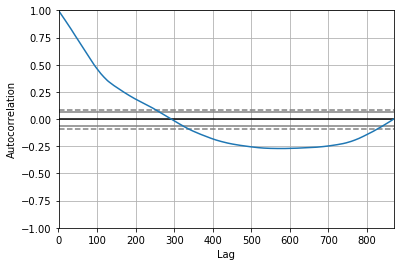

In [25]:
autocorrelation_plot(debt)
plt.show()

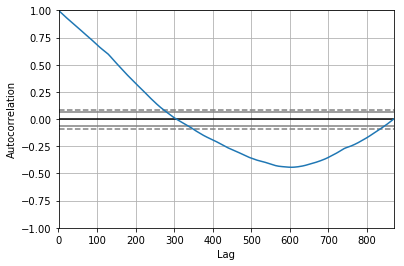

In [26]:
autocorrelation_plot(prod)
plt.show()

In [27]:
#Correlation Table
econ.corr()

,WTI,CPI,Prod,Debt
WTI,1.000000,0.839266,0.801016,0.814546
CPI,0.839266,1.000000,0.975032,0.903188
Prod,0.801016,0.975032,1.000000,0.840951
Debt,0.814546,0.903188,0.840951,1.000000


## Woah! All of these Economic Indicators are Highly correlated!

In [28]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [29]:
#Define Predictor Vairable X and Target Variable Y
x = econ[ ['WTI']]
y = econ[ ['CPI']]
#Fit the Model
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
#Obtain the prediction
Yhat=lm.predict(x)

In [31]:
#View Intercept and Slope
lm.intercept_, lm.coef_

(array([49.88460156]), array([[2.33641446]]))

In [32]:
#OIl Price = 49.88- 2.34 * CPI

C:\Users\Watson Turbo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


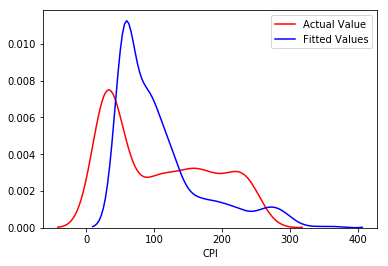

In [33]:
#Distribution Plot
ax1 = sns.distplot(econ['CPI'], hist=False, color="r", label="Actual Value")

sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

In [34]:
# P Value of same dataframe, note it should match the Correlation Table
from scipy import stats
pearson_coef, p_value = stats.pearsonr(econ['WTI'], econ['CPI'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8392661214888024  with a P-value of P = 1.2013961885775618e-231


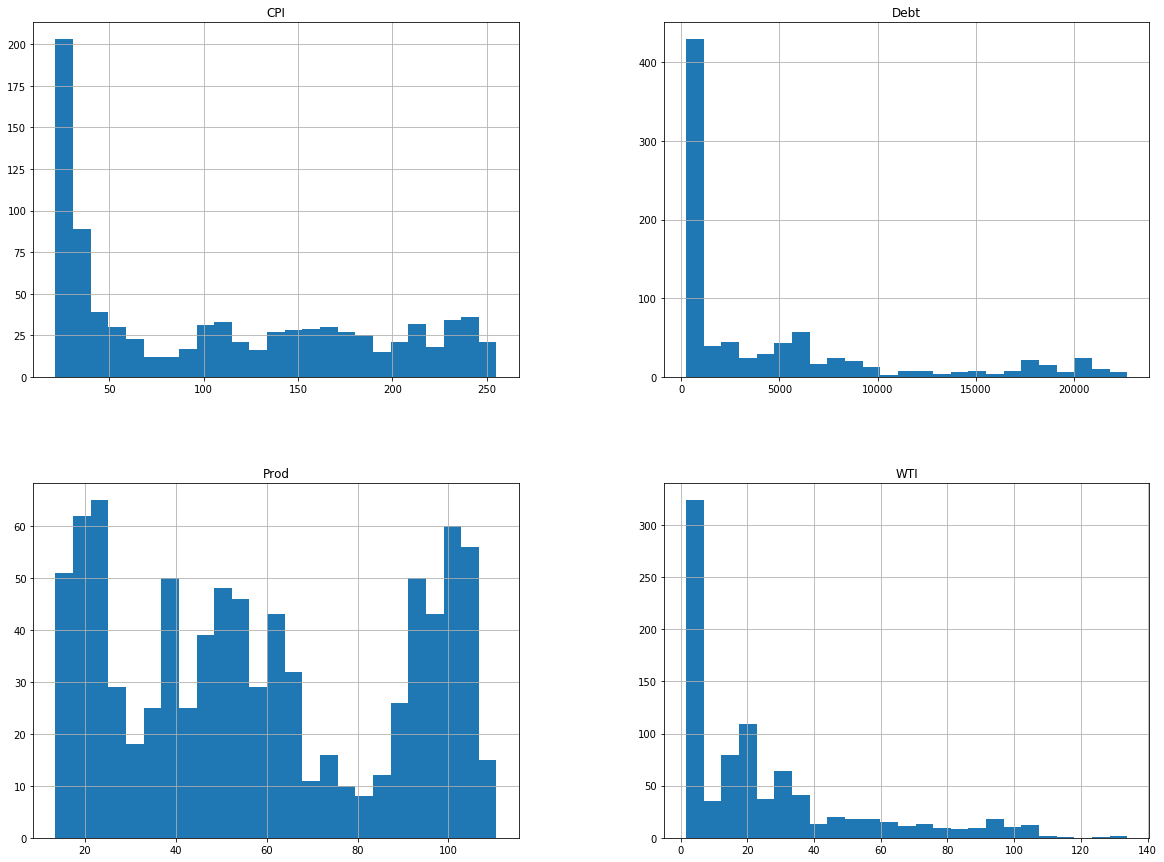

In [35]:
#Histogram
econ.hist(bins=25, figsize=(20,15))
plt.show()

(0, 415.43563017975686)

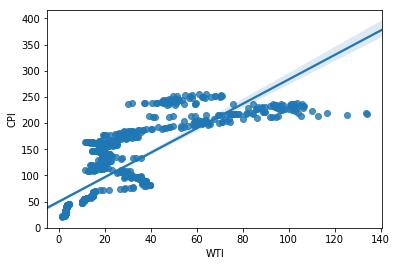

In [36]:
sns.regplot(x="WTI",y="CPI", data=econ)
plt.ylim(0,)

(0, 28415.146752761633)

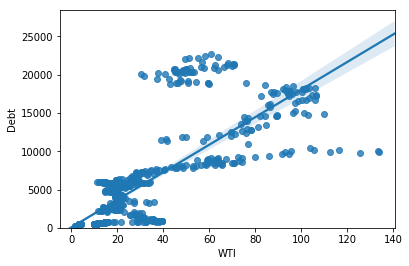

In [37]:
sns.regplot(x="WTI",y="Debt", data=econ)
plt.ylim(0,)

(0, 174.87581194736015)

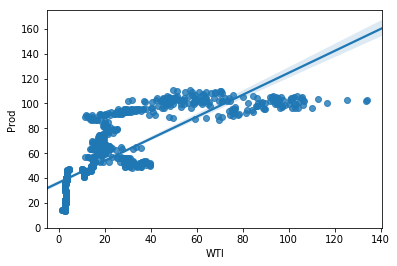

In [38]:
sns.regplot(x="WTI",y="Prod", data=econ)
plt.ylim(0,)

(0, 414.3125675443333)

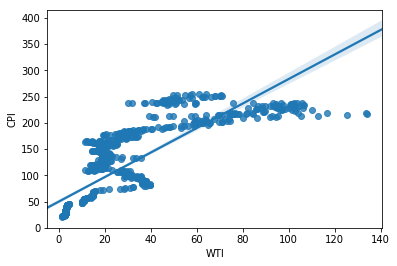

In [39]:
sns.regplot(x="WTI",y="CPI", data=econ)
plt.ylim(0,)

(0, 140.94158669831992)

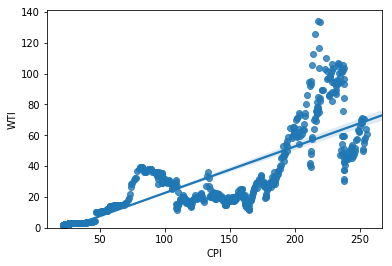

In [40]:
sns.regplot(x="CPI",y="WTI", data=econ)
plt.ylim(0,)

(0, 23980.268595542082)

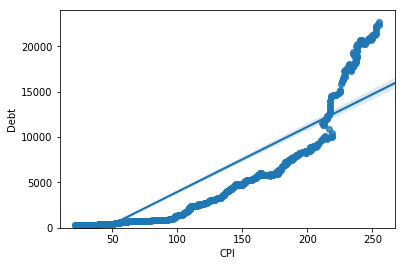

In [41]:
sns.regplot(x="CPI",y="Debt", data=econ)
plt.ylim(0,)

(0, 126.06772929764867)

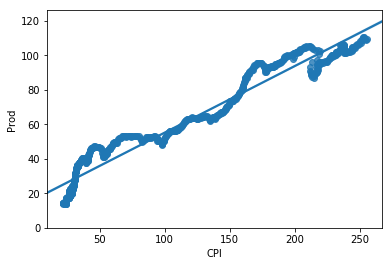

In [42]:
sns.regplot(x="CPI",y="Prod", data=econ)
plt.ylim(0,)

(0, 268.90242617393886)

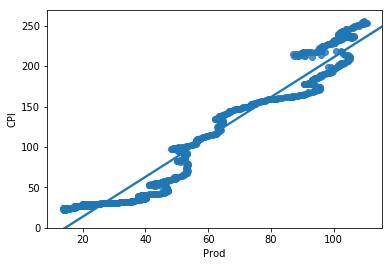

In [43]:
sns.regplot(x="Prod",y="CPI", data=econ)
plt.ylim(0,)

(0, 141.2917307628142)

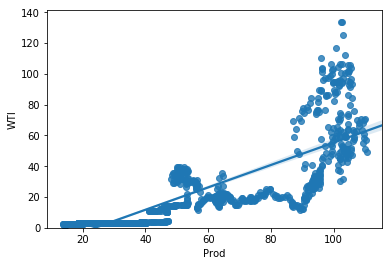

In [44]:
sns.regplot(x="Prod",y="WTI", data=econ)
plt.ylim(0,)

(0, 24050.937798683408)

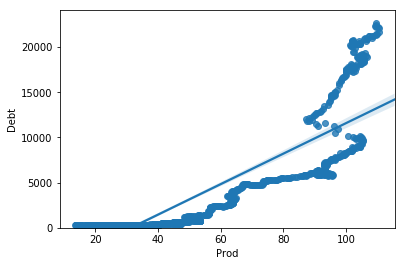

In [45]:
sns.regplot(x="Prod",y="Debt", data=econ)
plt.ylim(0,)

(0, 149.87480307033772)

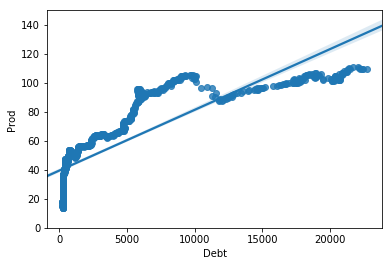

In [46]:
sns.regplot(x="Debt",y="Prod", data=econ)
plt.ylim(0,)

(0, 140.58768499769468)

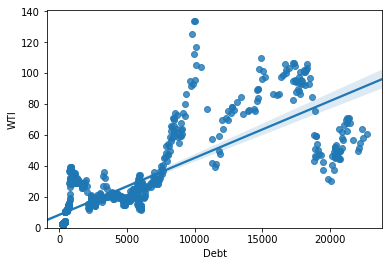

In [47]:
sns.regplot(x="Debt",y="WTI", data=econ)
plt.ylim(0,)

(0, 352.26820402960374)

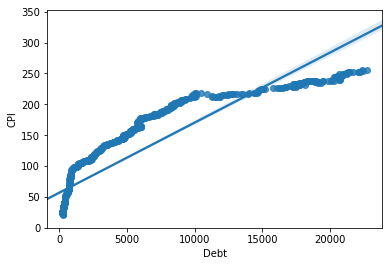

In [48]:
sns.regplot(x="Debt",y="CPI", data=econ)
plt.ylim(0,)

#Residual Plot to determine if Linear Regression is appropriate

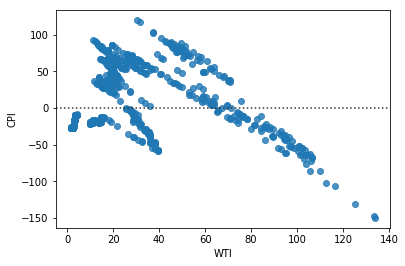

In [49]:
#
sns.residplot(econ['WTI'], econ['CPI'], robust=True)

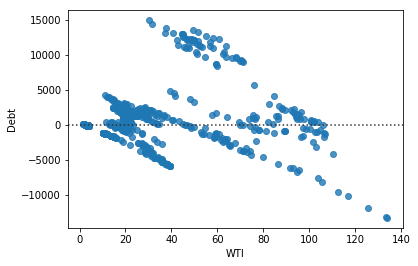

In [50]:
#
sns.residplot(econ['WTI'], econ['Debt'], robust=True)

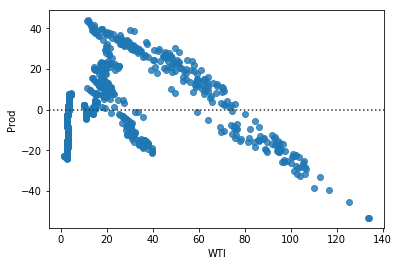

In [51]:
#
sns.residplot(econ['WTI'], econ['Prod'], robust=True)

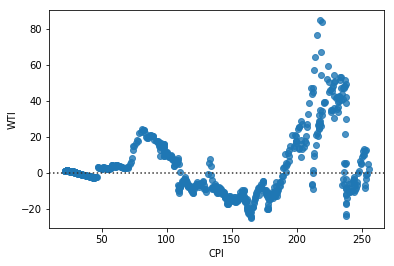

In [52]:
#
sns.residplot(econ['CPI'], econ['WTI'], robust=True)

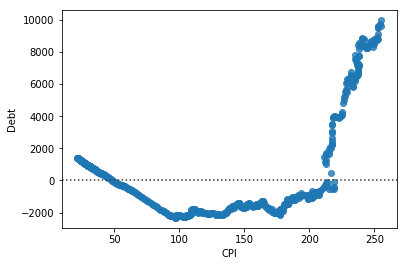

In [53]:
#
sns.residplot(econ['CPI'], econ['Debt'], robust=True)

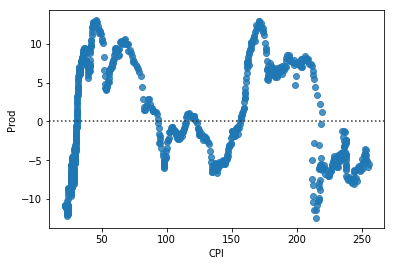

In [54]:
#
sns.residplot(econ['CPI'], econ['Prod'], robust=True)

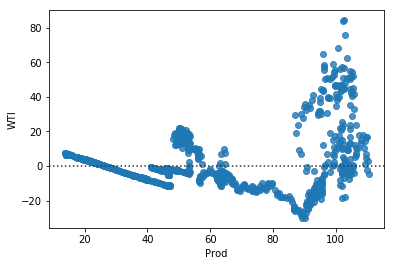

In [55]:
#
sns.residplot(econ['Prod'], econ['WTI'], robust=True)

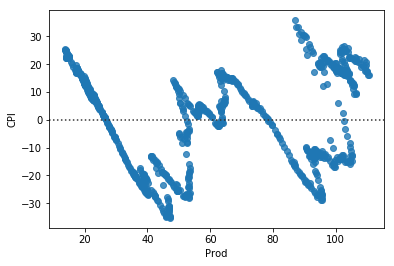

In [56]:
#
sns.residplot(econ['Prod'], econ['CPI'], robust=True)

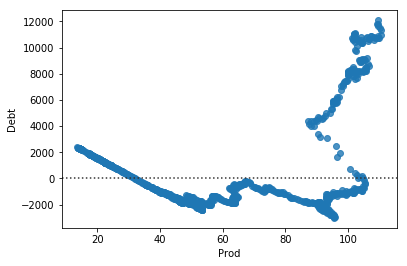

In [57]:
#
sns.residplot(econ['Prod'], econ['Debt'], robust=True)

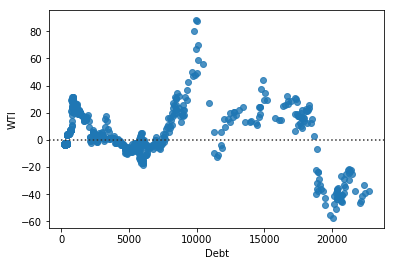

In [58]:
#
sns.residplot(econ['Debt'], econ['WTI'], robust=True)

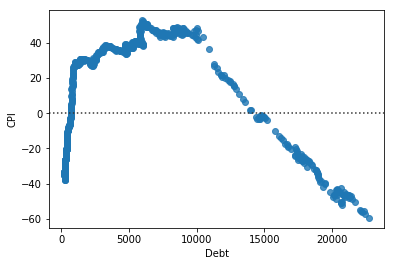

In [59]:
#
sns.residplot(econ['Debt'], econ['CPI'], robust=True)

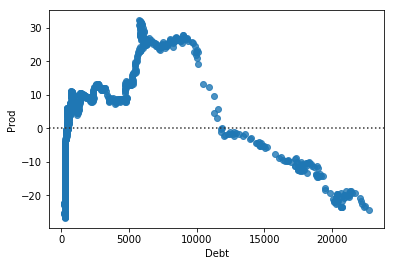

In [60]:
#
sns.residplot(econ['Debt'], econ['Prod'], robust=True)

In [61]:
#To call 5 highest Months of Oil Prices 
econ.nlargest(5, 'WTI')

,Date,WTI,CPI,Prod,Debt
737,2008-06-01,133.93,217.463,102.8445,9969.0
738,2008-07-01,133.44,219.016,102.3002,10045.5
736,2008-05-01,125.39,215.208,103.0863,9824.8
739,2008-08-01,116.61,218.690,100.7353,10134.7
735,2008-04-01,112.57,213.942,103.6704,9932.8


In [62]:
#To call 5 highest Months of Inflation
econ.nlargest(5, 'CPI')

,Date,WTI,CPI,Prod,Debt
868,2019-05-01,60.83,255.155,109.5645,22700.3
867,2019-04-01,63.86,254.958,109.1657,22346.6
866,2019-03-01,58.15,254.148,109.5985,22425.2
865,2019-02-01,54.95,253.113,109.4709,22221.4
861,2018-10-01,70.75,252.794,109.9165,21419.9


In [63]:
#To call 5 highest Months of Production
econ.nlargest(5, 'Prod')

,Date,WTI,CPI,Prod,Debt
863,2018-12-01,49.52,252.723,110.5516,22075.2
862,2018-11-01,56.96,252.760,110.5067,21683.9
864,2019-01-01,51.38,252.673,110.0907,22160.0
861,2018-10-01,70.75,252.794,109.9165,21419.9
860,2018-09-01,70.23,252.010,109.6749,21353.1


In [64]:
#To call 5 highest Months of Debt
econ.nlargest(5, 'Debt')

,Date,WTI,CPI,Prod,Debt
868,2019-05-01,60.83,255.155,109.5645,22700.3
866,2019-03-01,58.15,254.148,109.5985,22425.2
867,2019-04-01,63.86,254.958,109.1657,22346.6
865,2019-02-01,54.95,253.113,109.4709,22221.4
864,2019-01-01,51.38,252.673,110.0907,22160.0


In [65]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 2.3364144639339086
intercept 49.88460155937028
r_value 0.8392661214888023
p_value 1.2013961885785873e-231
std_err 0.05140633509958201
r-squared: 0.7043676226788571


In [66]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.882916493611895
intercept 36.3300040766315
r_value 0.8010161611474097
p_value 2.15420852806911e-195
std_err 0.022409724128482012
r-squared: 0.6416268904193331


In [67]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["WTI"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 180.15508916077238
intercept 45.277965842734375
r_value 0.8145458898057938
p_value 3.006437867111063e-207
std_err 4.357361974143156
r-squared: 0.6634850065995124


In [68]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.301473746868048
intercept -7.568515232625909
r_value 0.8392661214888023
p_value 1.2013961885785873e-231
std_err 0.0066330955806237595
r-squared: 0.7043676226788571


In [69]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.38605318001320255
intercept 16.5901702712182
r_value 0.9750322408231151
p_value 0.0
std_err 0.002986039078698132
r-squared: 0.9506878706445452


In [70]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["CPI"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 71.75613995525735
intercept -3218.3080006662767
r_value 0.9031882597022928
p_value 1.077e-320
std_err 1.1581801688906967
r-squared: 0.8157490324640563


In [71]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.7267129961459007
intercept -17.34569785853188
r_value 0.8010161611474096
p_value 2.1542085280694776e-195
std_err 0.01844504874701193
r-squared: 0.6416268904193329


In [72]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 2.4625826696001654
intercept -35.48339941886681
r_value 0.9750322408231153
p_value 0.0
std_err 0.01904755216807009
r-squared: 0.9506878706445456


In [73]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Prod"]
y=econ["Debt"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 168.742055047499
intercept -5297.483169239187
r_value 0.8409510303863557
p_value 1.8503979272449658e-233
std_err 3.6874795991663865
r-squared: 0.7071986355078733


In [74]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["WTI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.0036828546431314593
intercept 8.336699802898544
r_value 0.8145458898057938
p_value 3.006437867111063e-207
std_err 8.907620013973956e-05
r-squared: 0.6634850065995124


In [75]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["CPI"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.011368351655659104
intercept 56.65617957995393
r_value 0.9031882597022929
p_value 1.077e-320
std_err 0.0001834909103077444
r-squared: 0.8157490324640565


In [76]:
#Tooling with Scipy Linear Regression
from scipy import stats
x=econ["Debt"]
y=econ["Prod"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope", slope)
print("intercept", intercept)
print("r_value", r_value)
print("p_value", p_value)
print("std_err", std_err)

print ("r-squared:", r_value**2)

slope 0.004191004046435283
intercept 39.37181061398917
r_value 0.8409510303863557
p_value 1.8503979272449658e-233
std_err 9.158500479861811e-05
r-squared: 0.7071986355078733


## LSTM Model

In [77]:
def do_lstm_model(df, 
                  ts, 
                  look_back, 
                  epochs, 
                  type_ = None, 
                  train_fraction = 0.67):
  """
   Create LSTM model
   Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
  """
  # Import packages
  import numpy
  import matplotlib.pyplot as plt
  from pandas import read_csv
  import math
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import LSTM
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.metrics import mean_squared_error

  # Convert an array of values into a dataset matrix
  def create_dataset(dataset, look_back=1):
    """
    Create the dataset
    """
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

  # Fix random seed for reproducibility
  numpy.random.seed(7)

  # Get dataset
  dataset = df[ts].values
  dataset = dataset.astype('float32')

  # Normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset.reshape(-1, 1))
  
  # Split into train and test sets
  train_size = int(len(dataset) * train_fraction)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  
  # Reshape into X=t and Y=t+1
  look_back = look_back
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  
  # Reshape input to be [samples, time steps, features]
  if type_ == 'regression with time steps':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  elif type_ == 'stacked with memory between batches':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  else:
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  
  # Create and fit the LSTM network
  batch_size = 1
  model = Sequential()
  
  if type_ == 'regression with time steps':
    model.add(LSTM(4, input_shape=(look_back, 1)))
  elif type_ == 'memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  elif type_ == 'stacked with memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  else:
    model.add(LSTM(4, input_shape=(1, look_back)))
  
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    for i in range(100):
      model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
      model.reset_states()
  else:
    model.fit(trainX, 
              trainY, 
              epochs = epochs, 
              batch_size = 1, 
              verbose = 2)
  
  # Make predictions
  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    trainPredict = model.predict(trainX, batch_size=batch_size)
    testPredict = model.predict(testX, batch_size=batch_size)
  else:
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
  
  # Invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  
  # Calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))
  
  # Shift train predictions for plotting
  trainPredictPlot = numpy.empty_like(dataset)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  
  # Shift test predictions for plotting
  testPredictPlot = numpy.empty_like(dataset)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  
  # Plot baseline and predictions
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()
  plt.close()
  
  return

Predicting Production

Epoch 1/5
 - 4s - loss: 0.0307
Epoch 2/5
 - 1s - loss: 0.0073
Epoch 3/5
 - 1s - loss: 6.5144e-04
Epoch 4/5
 - 1s - loss: 5.5587e-05
Epoch 5/5
 - 1s - loss: 4.8966e-05
Train Score: 0.67 RMSE
Test Score: 0.83 RMSE


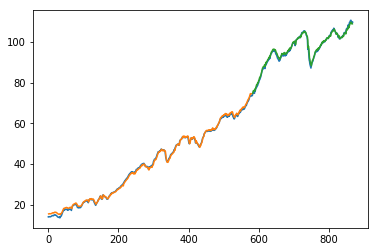

Epoch 1/5
 - 4s - loss: 0.0363
Epoch 2/5
 - 1s - loss: 0.0033
Epoch 3/5
 - 1s - loss: 2.6090e-04
Epoch 4/5
 - 1s - loss: 1.8104e-04
Epoch 5/5
 - 1s - loss: 1.4243e-04
Train Score: 1.06 RMSE
Test Score: 3.73 RMSE


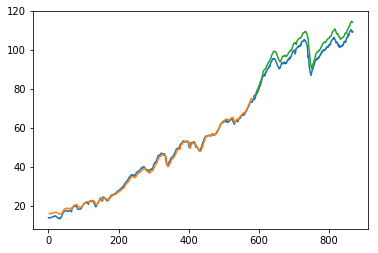

Epoch 1/5
 - 5s - loss: 0.0172
Epoch 2/5
 - 2s - loss: 5.0142e-04
Epoch 3/5
 - 2s - loss: 5.9452e-05
Epoch 4/5
 - 2s - loss: 5.9711e-05
Epoch 5/5
 - 2s - loss: 5.9154e-05
Train Score: 0.71 RMSE
Test Score: 8.32 RMSE


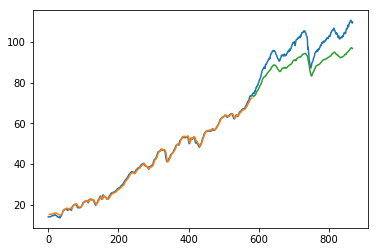

In [87]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'Prod', 
              look_back = 1, 
              epochs = 5)

# LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'Prod', 
              look_back = 3, 
              epochs = 5)

# LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
              ts = 'Prod', 
              look_back = 3, 
              epochs = 5, 
              type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 

Predicting Debt

Epoch 1/5
 - 4s - loss: 0.0027
Epoch 2/5
 - 1s - loss: 0.0012
Epoch 3/5
 - 1s - loss: 1.4214e-04
Epoch 4/5
 - 1s - loss: 3.6164e-06
Epoch 5/5
 - 1s - loss: 2.6622e-06
Train Score: 38.67 RMSE
Test Score: 568.58 RMSE


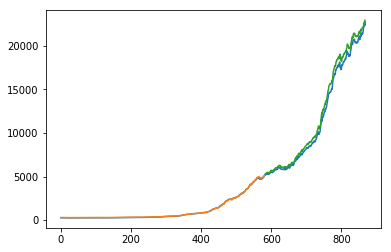

Epoch 1/5
 - 5s - loss: 0.0034
Epoch 2/5
 - 1s - loss: 7.7729e-04
Epoch 3/5
 - 1s - loss: 1.1564e-05
Epoch 4/5
 - 1s - loss: 9.1522e-06
Epoch 5/5
 - 1s - loss: 8.7753e-06
Train Score: 65.01 RMSE
Test Score: 1649.46 RMSE


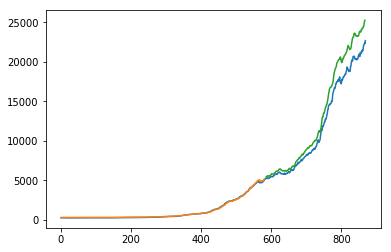

Epoch 1/5
 - 6s - loss: 0.0017
Epoch 2/5
 - 2s - loss: 6.1934e-05
Epoch 3/5
 - 2s - loss: 3.8883e-06
Epoch 4/5
 - 2s - loss: 3.4957e-06
Epoch 5/5
 - 2s - loss: 3.3644e-06
Train Score: 56.30 RMSE
Test Score: 2121.07 RMSE


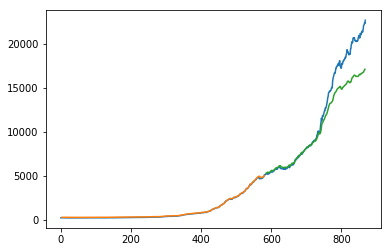

In [89]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'Debt', 
              look_back = 1, 
              epochs = 5)

# LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'Debt', 
              look_back = 3, 
              epochs = 5)

# LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
              ts = 'Debt', 
              look_back = 3, 
              epochs = 5, 
              type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 

Predicting Oil Price

Epoch 1/5
 - 5s - loss: 0.0051
Epoch 2/5
 - 1s - loss: 0.0014
Epoch 3/5
 - 1s - loss: 1.1978e-04
Epoch 4/5
 - 1s - loss: 7.3582e-05
Epoch 5/5
 - 1s - loss: 7.2541e-05
Train Score: 1.14 RMSE
Test Score: 5.01 RMSE


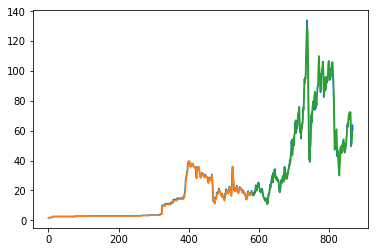

Epoch 1/5
 - 5s - loss: 0.0062
Epoch 2/5
 - 1s - loss: 0.0011
Epoch 3/5
 - 1s - loss: 2.1088e-04
Epoch 4/5
 - 1s - loss: 2.0191e-04
Epoch 5/5
 - 1s - loss: 1.9439e-04
Train Score: 1.84 RMSE
Test Score: 10.49 RMSE


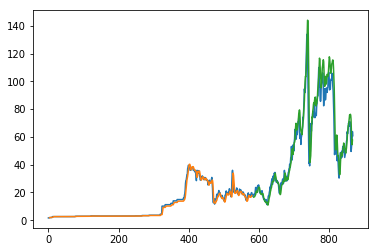

Epoch 1/5
 - 6s - loss: 0.0028
Epoch 2/5
 - 2s - loss: 2.2612e-04
Epoch 3/5
 - 2s - loss: 1.7739e-04
Epoch 4/5
 - 2s - loss: 1.7359e-04
Epoch 5/5
 - 2s - loss: 1.7516e-04
Train Score: 1.94 RMSE
Test Score: 9.62 RMSE


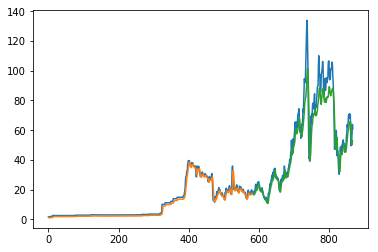

In [90]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'WTI', 
              look_back = 1, 
              epochs = 5)

# LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'WTI', 
              look_back = 3, 
              epochs = 5)

# LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
              ts = 'WTI', 
              look_back = 3, 
              epochs = 5, 
              type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 

Predicting Inflation

Epoch 1/5
 - 6s - loss: 0.0251
Epoch 2/5
 - 1s - loss: 0.0067
Epoch 3/5
 - 1s - loss: 2.9453e-04
Epoch 4/5
 - 1s - loss: 2.8727e-05
Epoch 5/5
 - 1s - loss: 2.5956e-05
Train Score: 1.15 RMSE
Test Score: 2.23 RMSE


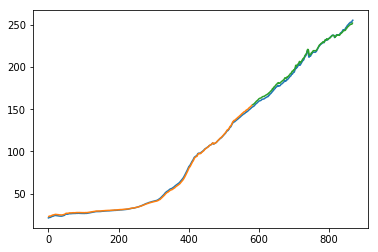

Epoch 1/5
 - 6s - loss: 0.0297
Epoch 2/5
 - 1s - loss: 0.0028
Epoch 3/5
 - 1s - loss: 1.3910e-04
Epoch 4/5
 - 1s - loss: 1.1400e-04
Epoch 5/5
 - 1s - loss: 8.7752e-05
Train Score: 1.96 RMSE
Test Score: 7.54 RMSE


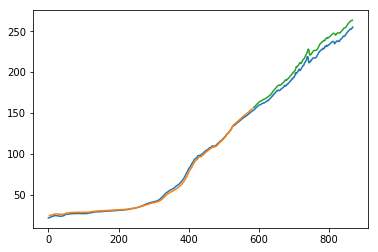

Epoch 1/5
 - 7s - loss: 0.0139
Epoch 2/5
 - 2s - loss: 2.0067e-04
Epoch 3/5
 - 2s - loss: 1.6052e-05
Epoch 4/5
 - 2s - loss: 1.5212e-05
Epoch 5/5
 - 2s - loss: 1.4623e-05
Train Score: 0.85 RMSE
Test Score: 20.69 RMSE


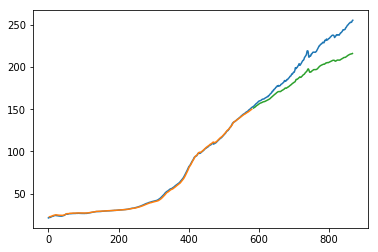

In [91]:
# LSTM Network for Regression
do_lstm_model(df = econ, 
              ts = 'CPI', 
              look_back = 1, 
              epochs = 5)

# LSTM for Regression Using the Window Method
do_lstm_model(df = econ, 
              ts = 'CPI', 
              look_back = 3, 
              epochs = 5)

# LSTM for Regression with Time Steps
do_lstm_model(df = econ, 
              ts = 'CPI', 
              look_back = 3, 
              epochs = 5, 
              type_ = 'regression with time steps')

# LSTM with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
                #look_back = 3, 
                #epochs = 5, 
                #type_ = 'memory between batches')

#  Stacked LSTMs with Memory Between Batches
#do_lstm_model(df = econ, 
                #ts = 'Prod', 
               #look_back = 3, 
                #epochs = 5) 